In [2]:
# A
import tensorflow as tf #importing tensorflow library used for training and building neural networks

In [4]:
from tensorflow import keras #importing keras api from tensortflow for training and bulding dl models
from tensorflow.keras.preprocessing.image import ImageDataGenerator #importing the Imagegeneratorclass from keras used for generating and loading image data

In [5]:
import matplotlib.pyplot as plt  #used for plotting the training and validation accuracy and loss
import numpy as np #used for data processing of numerical data

In [7]:
train_data_dir= 'C:/Users/EC1023AX/Desktop/Dataset1/mnist-jpg/train' #LOADING THE DATASET IN THE VARIABLE
test_data_dir= 'C:/Users/EC1023AX/Desktop/Dataset1/mnist-jpg/test'


In [8]:
train_datagen= ImageDataGenerator(rescale=1.0/255) #preprocessing of data which makes the pixel value of image between 0 to 1
test_datagen= ImageDataGenerator(rescale=1.0/255)


In [9]:
# Create data generators
train_batch_size=10000 #this is the batch size of training data means in each iteration it processes 1000 images
train_generator = train_datagen.flow_from_directory( #loads and preprocesses the image
    train_data_dir,  
    target_size=(28,28), #resizes the  images to 28 pixels
    batch_size=train_batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle='True', #introduce randomness in each training iteration
)

test_batch_size=2000
test_generator= test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28,28),
    batch_size=test_batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle='True',
)




Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [10]:
#Selecting first batch containing 10000 images
x_train, y_train=train_generator[0] #extracts data from generator for training the data
x_test, y_test= test_generator[0]   #extracts data from generator for testing the data


In [11]:
# C Define the network architecture using Keras
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)), #it is the input layer anf flatten is used for tranforming the input data
    keras.layers.Dense(128, activation="relu"), #adds a dense layer of 128 neurons to it
    keras.layers.Dense(10, activation="softmax")
]

)

In [12]:
#train madel using sgd
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
313/313 [==============================] - 3s 6ms/step - loss: 1.4380 - accuracy: 0.6516 - val_loss: 0.8530 - val_accuracy: 0.8270
Epoch 2/8
313/313 [==============================] - 1s 3ms/step - loss: 0.7078 - accuracy: 0.8404 - val_loss: 0.5585 - val_accuracy: 0.8640
Epoch 3/8
313/313 [==============================] - 1s 3ms/step - loss: 0.5296 - accuracy: 0.8722 - val_loss: 0.4526 - val_accuracy: 0.8885
Epoch 4/8
313/313 [==============================] - 1s 4ms/step - loss: 0.4526 - accuracy: 0.8856 - val_loss: 0.4000 - val_accuracy: 0.8930
Epoch 5/8
313/313 [==============================] - 1s 4ms/step - loss: 0.4091 - accuracy: 0.8928 - val_loss: 0.3722 - val_accuracy: 0.8945
Epoch 6/8
313/313 [==============================] - 1s 2ms/step - loss: 0.3794 - accuracy: 0.8997 - val_loss: 0.3493 - val_accuracy: 0.9040
Epoch 7/8
313/313 [==============================] - 1s 3ms/step - loss: 0.3580 - accuracy: 0.9033 - val_loss: 0.3313 - val_accuracy: 0.9045
Epoch 8/8
313

In [13]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print("loss:", test_loss)
print("accuracy;", test_acc)

63/63 [==============================] - 0s 4ms/step - loss: 0.3177 - accuracy: 0.9095
loss: 0.31768175959587097
accuracy; 0.909500002861023


63/63 [==============================] - 0s 2ms/step
actual number: 3
predicted no 3


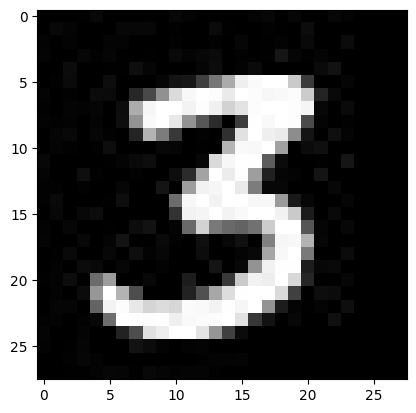

In [25]:
n=30
plt.imshow(x_test[n], cmap='gray')
predicted_value=model.predict(x_test)
print("actual number:", np.argmax(y_test[n]))
print("predicted no",np.argmax(predicted_value[n]))

In [20]:
history = history.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

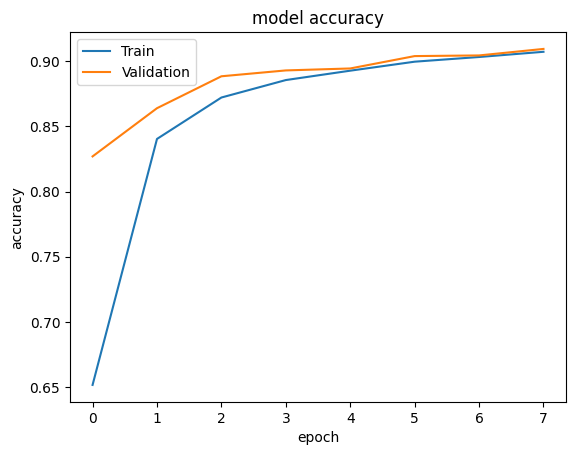

In [22]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['Train',"Validation"], loc='upper left')

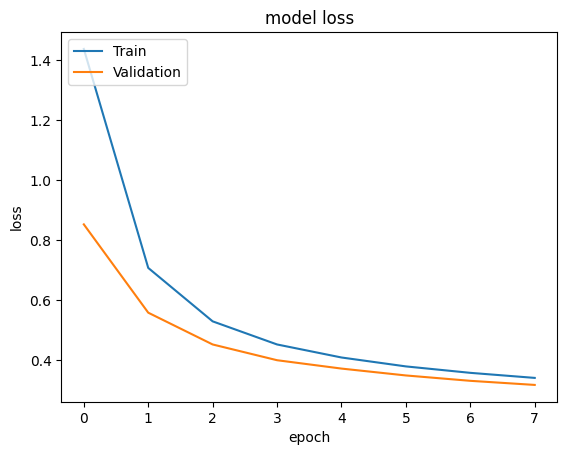

In [23]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['Train',"Validation"], loc='upper left')

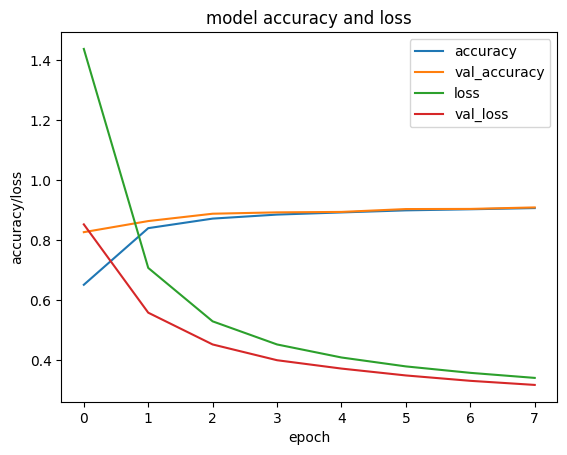

In [24]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("model accuracy and loss")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])